In [2]:
import baseline 
import zfpy 
import os 
import fpzip 
import numpy as np   
from matplotlib import pyplot as plt 

In [49]:
path = "/home/pjiao/data/NYX512x512x512/velocity_x.f32"
dims = (512,512,512)
# path = "/home/pjiao/data/aramco/pressure_2000_352x1008x1008.f32" 
# dims = (1008,1008,352) 
data = np.fromfile(path, dtype=np.float32).reshape(dims)
rel_eb = 0.01
decompressecd, cr = baseline.sz3(data, rel_eb, data.shape, config ="./configs/sz3_interp.config",
                                 compressor_path = "/lcrc/project/ECP-EZ/jp/git/SZ3/build_lorenzo/tools/sz3/sz3")
print("Compression ratio: ", cr)

/lcrc/project/ECP-EZ/jp/git/SZ3/build_lorenzo/tools/sz3/sz3 -f -i /tmp/input_file2b4d0ee2-9067-4f82-8012-ec6c2935510b.dat -z /tmp/2b4d0ee2-9067-4f82-8012-ec6c2935510b.sz3 -o /tmp/2b4d0ee2-9067-4f82-8012-ec6c2935510b.sz3.out  -M REL 0.01 -3 512 512 512 -c ./configs/sz3_interp.config
Compression ratio:  1187.5179154823654


Text(0.5, 1.0, 'Error')

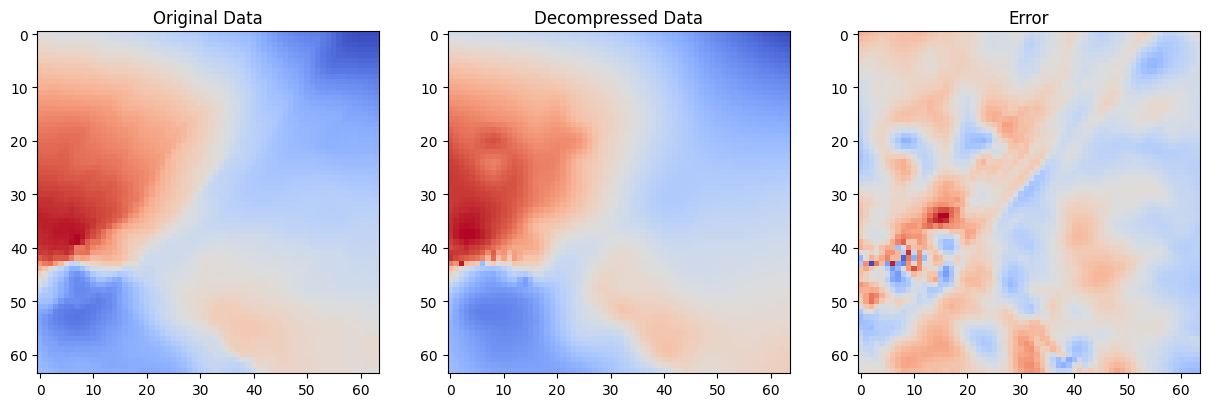

In [54]:
# locations = (63, slice(None), slice(None))
# locations = (-1, slice(256,256+128), slice(256,256+128))
# locations = (2**9-1, slice(None), slice(None))
locations = (slice(None,None, 2 ), slice(None,None, 2 ), 2**9-1)
locations = (slice(None,None, 1 ), slice(None,None, 1), 2**9-1)
locations = ( 219, slice(256,256+128,2), slice(256,256+128,2))
locations = ( 219, slice(0,64), slice(0,64)) 
locations = (  slice(0,64), 219, slice(0,64)) 
# locations = (slice(256,256+128,2), slice(256,256+128,2), 2**9-1) 
# locations = ( 219, slice(400,600,1), slice(0,200,1))
# locations = ( 219, slice(400,600,2), slice(0,200,2))
error = data - decompressecd
figs, axs = plt.subplots(1, 3, figsize=(15, 5)) 
axs[0].imshow(data[locations], cmap='coolwarm')
axs[0].set_title("Original Data")
axs[1].imshow(decompressecd[locations], cmap='coolwarm')
axs[1].set_title("Decompressed Data")
axs[2].imshow(error[locations], cmap='coolwarm')
axs[2].set_title("Error")